In [ ]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

## <h1 style="text-align:center">Clase 2: Secuencias, sistemas LTI y suma de convolución</h1>
<h3 style="text-align:center">ACUS340: Procesamiento digital de señales</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<a href="https://github.com/vpobleteacustica/ACUS340-Analisis-de-senales-en-Acustica-y-Vibraciones">https://github.com/vpobleteacustica/ACUS340-Analisis-de-senales-en-Acustica-y-Vibraciones</a><br> 
<p style="text-align:center">Diego Espejo Alquinta - Ayudante <br>
<a href="mailto:diego.espejo@alumnos.uach.cl">diego.espejo@alumnos.uach.cl </a><br>
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br> 

#### Representación gráfica de una señal en tiempo discreto

<p style="text-align:center">
    <a title="sistema"><img src="discrete_time.png" width="780" height="780" alt="Tiny"></a>
    <strong>Figure 1. Representación gráfica señal en tiempo discreto. (Ref. Oppenheim and Schafer, Discrete Time Signal Processing, 2001).</strong>

#### Secuencia impulso de Dirac, llamada también, secuencia impulso unitario $\delta[n]$ 

$$
\begin{align*}
\delta[n] &= \left\{ \begin{array}{lcc}
             1, &   si  & n = 0\\
             \\ 0, &  si  & n \neq 0
             \end{array}
   \right.
\end{align*}
$$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

> + Usemos la librería: scipy.signal.unit_impulse

#### Una delta unitaria centrada en n=0 ($\delta[n]$)

In [3]:
delta = signal.unit_impulse(8)
print(delta)

[1. 0. 0. 0. 0. 0. 0. 0.]


#### Impulso shifteado dos muestras a la derecha: $\delta[n-2]$

In [4]:
delta_2 = signal.unit_impulse(7, 2)
print(delta_2)

[0. 0. 1. 0. 0. 0. 0.]


#### Impulso en dos dimensiones (el caso de imágenes) centrado:

In [5]:
delta_2D = signal.unit_impulse((5, 5), 'mid')
print(delta_2D)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


#### Impulso no centrado, por ejemplo ubicado en (2,2)

In [6]:
delta_2d_not_centered = signal.unit_impulse((4, 4), 2)
print(delta_2d_not_centered)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]]


#### Plotear impulso

In [7]:
print(len(delta))

8


In [8]:
n1 = np.arange(1,9,1)
print(len(n1))

8


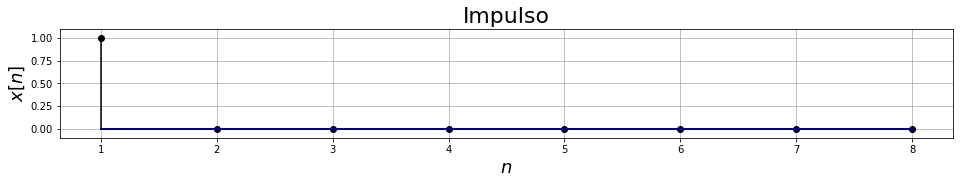

In [9]:
plt.figure(figsize=(16,2))
markerline, stemlines, baseline = plt.stem(n1, delta,linefmt='black',markerfmt='ko',use_line_collection=True)
plt.xlabel('$n$',fontsize=18)
plt.ylabel('$x[n]$',fontsize=18)
plt.title('Impulso',fontsize=22)
plt.ylim(np.min(delta)-0.1,np.max(delta)+0.1)
plt.setp(baseline, color='navy',linewidth=2)
plt.grid()

In [10]:
n = np.arange(-50, 50)
impulso = signal.unit_impulse(100, 'mid')

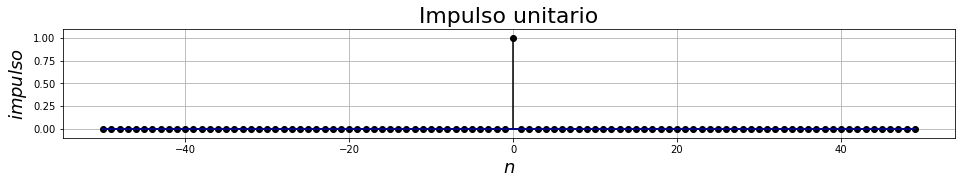

In [11]:
plt.figure(figsize=(16,2))
markerline, stemlines, baseline = plt.stem(n, impulso,linefmt='black',markerfmt='ko',use_line_collection=True)
plt.xlabel('$n$',fontsize=18)
plt.ylabel('$impulso$',fontsize=18)
plt.title('Impulso unitario',fontsize=22)
plt.ylim(np.min(delta)-0.1,np.max(delta)+0.1)
plt.setp(baseline, color='navy',linewidth=2)
plt.grid()

#### Escalón unitario $u[n]$

$$
\begin{align*}
u[n] &= \left\{ \begin{array}{lcc}
             1, &   si  & n \ge 0\\
             \\ 0, &  si  & n < 0
             \end{array}
   \right.
\end{align*}
$$

In [12]:
# Darnos un intervalo
lim_sup = 50
lim_inf = -50

# Usaremos np.arange que nos devuelve valores espaciados uniformemente dentro del intervalo dado.
n = np.arange(lim_inf, lim_sup, 1)

# Punto de inicio del escalón
n0 = 0 

u_n =[]
for s in n:
    if s < n0:
        u_n.append(0)
    else:
        u_n.append(1)

In [13]:
def escal_unit_inf(n0, n):
    u_n = []
    for s in n:
        if s < n0:
            u_n.append(0)
        else:
            u_n.append(1)
    return u_n

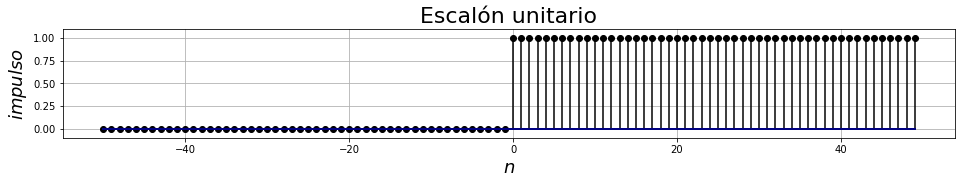

In [14]:
plt.figure(figsize=(16,2))
markerline, stemlines, baseline = plt.stem(n, u_n,linefmt='black',markerfmt='ko',use_line_collection=True)
plt.xlabel('$n$',fontsize=18)
plt.ylabel('$impulso$',fontsize=18)
plt.title('Escalón unitario',fontsize=22)
plt.ylim(np.min(delta)-0.1,np.max(delta)+0.1)
plt.setp(baseline, color='navy',linewidth=2)
plt.grid()

### Sistemas: 

> + Un sistema en tiempo discreto
> + Matemáticamente, es una transformación $T\big\{\cdot\big\}$ de una señal $x[n]$, en una señal de salida $y[n]$. 
$$
\begin{align*}
y[n] &= T\big\{x[n]\big\}
\end{align*}
$$
>> + O equivalentemente,
$$
\begin{align*}
x[n] \xrightarrow[]{T}y[n]
\end{align*}
$$



<!--- Inline HTML works too --->
<p style="text-align:center">
    <a title="sistema"><img src="LTI.png" width="380" height="480" alt="Tiny"></a>
    <strong>Figure 1. Representación de un sistema en tiempo discreto.</strong>

### Propiedades de los sistemas:

> + **Sistema invariante en el tiempo**.
>> + La propiedad de invariancia en el tiempo quiere decir que las características de entrada y salida NO cambian con el tiempo:
>> + Un sistema es invariante en el tiempo si y sólo si:
$$
\begin{align*}
x[n] \xrightarrow[]{T}y[n] \implies x[n-n_{0}] \xrightarrow[]{T}y[n-n_{0}], \,\,\,\, \forall \,{\text{entrada}} \,\,\, x[n] \,\,\, {\text{y}} \,\,\, \forall \,\,\, {\text{desplazamiento de tiempo}}\,\, n_{0}.
\end{align*}
$$
<p style="text-align:center">
    <a title="sistema"><img src="invariante.png" width="480" height="480" alt="Tiny"></a>
    <strong>Figure 2. Sistema invariante en el tiempo.</strong>
    
> + **Sistema lineal**.
>> + La propiedad de sistema lineal quiere decir que obedece al principio de superposición:
>> + Un sistema es lineal si y sólo si:
$$
\begin{align*}
T[a_1\cdot x_1[n] + a_2\cdot x_2[n]] = a_1\cdot T[x_1[n]] + a_2\cdot T[x_2[n]] \,\,\,\, {\text{para cualquier secuencia de entrada arbitraria}} \,\,\, x_1[n], {\text{y}}\, x_2[n] \,\,\, {\text{y}} \,\,\, {\text{para cualquier constante arbitraria}} \,\,\, c_1, \,{\text{y}}\, c_2.
\end{align*}
$$
<p style="text-align:center">
    <a title="sistema"><img src="lineal.png" width="480" height="480" alt="Tiny"></a>
    <strong>Figure 3. Sistema lineal.</strong>

#### Sistema LTI (linear time invariant), o sistema lineal e invariante en el tiempo, nos permite estimar la salida del sistema a través de la suma de convolución.
    
> + Respuesta impulso del sistema LTI, la llamamos $h[n]$, que corresponde a la salida del sistema cuando en la entrada hay un impulso de Dirac $\delta [n]$:

<p style="text-align:center">
    <a title="sistema"><img src="respuesta_impulso.png" width="380" height="380" alt="Tiny"></a>
    <strong>Figure 4. Respuesta al impulso de un sistema LTI.</strong>


$$
\begin{align*}
\delta[n] \xrightarrow[]{T}h[n]
\end{align*}
$$
    
$$
\begin{align*}
\hspace{0.15cm} \delta[n - k] \xrightarrow[]{T}h[n - k]
\end{align*}
$$ 
    
$$
\begin{align*}
\hspace{0.15cm} x[k] \delta[n - k] \xrightarrow[]{T} x[k] h[n - k]
\end{align*}
$$     
    
$$
\begin{align*}
\hspace{0.15cm} \sum_{k=-\infty}^{\infty} x[k] \delta[n - k] \xrightarrow[]{T} \sum_{k=-\infty}^{\infty} x[k] h[n - k]
\end{align*}
$$
    
$$
\begin{align*}
\hspace{0.15cm} x[n] \xrightarrow[]{T} y[n]
\end{align*}
$$ 
    
>> + Por lo tanto, por definición la suma de convolución es:
$$
\begin{align*}
\hspace{0.15cm} y[n] =   \sum_{k=-\infty}^{\infty} x[k] h[n - k] = x[n]*h[n], \quad {\text{para cualquier sistema LTI.}}
\end{align*}
$$     
    


#### En resumen,
 
>> + Merece un cierto cuidado la dependencia de $n$ en $y[n]$.
>> + Por cada valor de $n$ debemos calcular la convolución, separadamente para todos los valores de la variable "k". Así que por cada $n$, tenemos que:
   1. Renombrar la variable independiente como $k$, así que ahora escribimos $x[k]$ y $h[k]$.
   2. Fipeamos $h[k]$ en el origen. Esto es, hacemos $h[-k]$.
   3. Desplazamos hacia la izquierda lo más lejos posible $h[-k]$ hasta un punto $n$, estos es, $h[n-k]$, donde las dos señales NO se tocan.
   4. Desplazamos/shifteamos, el valor de $n$ en una muestra en $h[n-k]$, hasta que se ecuentren traslapadas la primera muestra de $x[k]$ con la primera de $h[n-k]$. Multiplicamos las amplitudes.
   5. Continuamos moviendo $n$ en $h[n-k]$ paso a paso, multiplicamos y sumamos los productos resultantes.
   6. Repetimos este shifteo hacia la derecha muestra a muestra hasta la zona en que ya no estén traslapadas $x[k]$ y $h[n-k]$.
   7. Esta es la suma de convolución para cada valor específico de $n$:
$$
\begin{align*}
\hspace{0.15cm} y[n] =   \sum_{k=-\infty}^{\infty} x[k] \cdot h[n - k] = x[n]*h[n], \quad {\text{para cualquier sistema LTI.}}
\end{align*}
$$  

#### Ejercicios:
>> + Crear una secuencia exponencial con $a = 0.85$
>> + Sean $x[n]= [1, 2, 3, 4]$ y $h[n]=[1, 1, 1]$. Realizar el procedimiento gráfico para entender la suma de convolución. Usar:

In [15]:
x1 = [1, 2, 3, 4]
x2 = [1, 1, 1]
y = np.convolve(x1, x2)